## Aprendizaje Supervisado con scikit-learn
Los valores a predeir son conocidos.

Objetivo: predecir los valores objetivo con datos divertidos que se ven, dadas las características.

### Tipos de Apredizaje supervisado

        Clasificacion: La variable es binaria el objetivo consta de categorías.
        Regresion: La variable objetivo es continua.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Archivo de ejemplo para Clasificasion con KNN
file = r'C:\Users\rfigu\Documents\GitHub\rofigueredo\PythonAnalysis\Supervised Learning with scikit-learn\data\telecom_churn_clean.csv'
churn_df = pd.read_csv(file, delimiter=',', usecols=lambda c: not c.startswith('Unnamed:'))
# churn_df = pd.read_csv(file, delimiter=',', usecols=lambda c: 'Unnamed:' not in c)
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Classification
### k-NearestNeighbors

Creamos los dataframes correspondientes a Feature y el Target

In [25]:
# Sample Code
from sklearn.model_selection import train_test_split
# Feature
X = churn_df[["total_day_charge", "total_eve_charge"]].values
# Target variable
y = churn_df["churn"].values
print(X.shape, y.shape)

(3333, 2) (3333,)


In [26]:
# Establecemos un 30 % para realizar el test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,                                                    
random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.872


In [27]:
knn = KNeighborsClassifier(n_neighbors=14)

Predicting on unlabeled data

In [28]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=14)

In [29]:
X_new = np.array([[56.8, 17.5],                  
                  [24.4, 24.1],                  
                  [50.1, 10.9]])
print(X_new.shape)

(3, 2)


In [30]:
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

Predictions: [1 0 0]


Complejidad del modelo y ajuste excesivo o insuficiente

In [31]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:    
    knn = KNeighborsClassifier(n_neighbors=neighbor)    
    knn.fit(X_train, y_train)    
    train_accuracies[neighbor] = knn.score(X_train, y_train)    
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] 
 {1: 1.0, 2: 0.9061294470638662, 3: 0.9048435490784398, 4: 0.8911273039005573, 5: 0.8906986712387484, 6: 0.8851264466352337, 7: 0.8829832833261895, 8: 0.8825546506643807, 9: 0.8834119159879983, 10: 0.8825546506643807, 11: 0.8812687526789541, 12: 0.8804114873553365, 13: 0.8816973853407629, 14: 0.8799828546935277, 15: 0.8834119159879983, 16: 0.8812687526789541, 17: 0.8808401200171453, 18: 0.8795542220317188, 19: 0.8786969567081011, 20: 0.8808401200171453, 21: 0.8808401200171453, 22: 0.8782683240462923, 23: 0.8821260180025718, 24: 0.8774110587226747, 25: 0.8812687526789541} 
 {1: 0.807, 2: 0.871, 3: 0.855, 4: 0.873, 5: 0.867, 6: 0.872, 7: 0.875, 8: 0.876, 9: 0.88, 10: 0.878, 11: 0.878, 12: 0.877, 13: 0.878, 14: 0.877, 15: 0.879, 16: 0.881, 17: 0.879, 18: 0.876, 19: 0.878, 20: 0.877, 21: 0.876, 22: 0.877, 23: 0.881, 24: 0.879, 25: 0.88}


### Visualizing model complexity

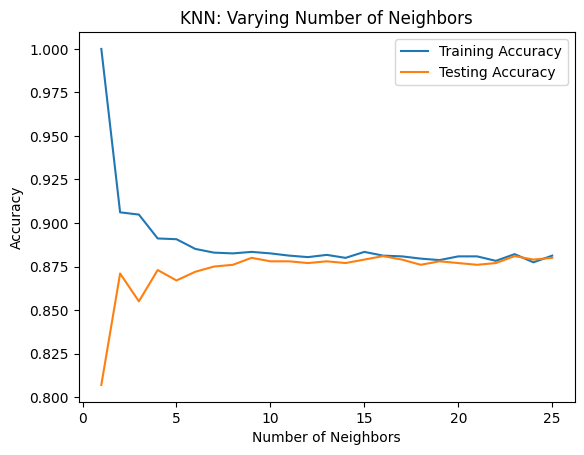

In [32]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

### Regresion 
Para variables continuas

In [33]:
# Archivo de ejemplo para Regresion 
file = r'C:\Users\rfigu\Documents\GitHub\rofigueredo\PythonAnalysis\Supervised Learning with scikit-learn\data\advertising_and_sales_clean.csv'
sales_df = pd.read_csv(file, delimiter=',', usecols=lambda c: not c.startswith('Unnamed:'))
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [34]:
import numpy as np

# Create X from the radio column's values
X = sales_df['radio'].values
# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1,1)

# # Check the shape of the features and targets
print(X.shape)

(4546, 1)


Construyendo el Modelo de REGRESION Lineal Simple

In [35]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)
print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


Visualizando un modelo de regresion Lineal Simple

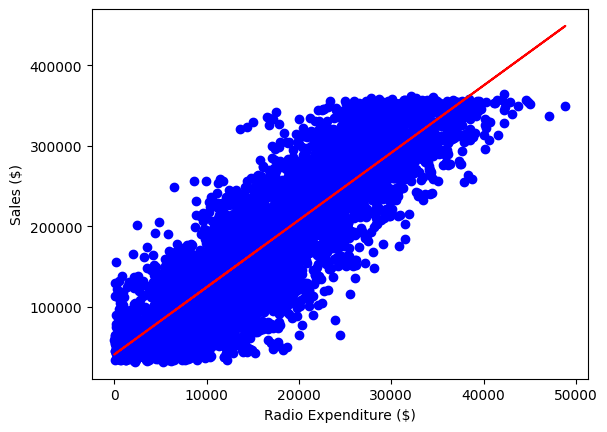

In [36]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

#### Fit and predict for regression - Entrenando y prediciondo con Regresion

In [37]:
# Create X and y arrays
X = sales_df.drop(["influencer","sales"], axis=1).values
y = sales_df["sales"].values

# Divide the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciate the model
regAll = LinearRegression()
# Train the model
regAll.fit(X_train, y_train)

# Make predictions
y_pred = regAll.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


#### Regression Performance - Evaluando el modelo
Evaluate performance using some common regression metrics.

In [38]:
# Using mean_squared_error
from sklearn.metrics import mean_squared_error
# Compute R-squared
r_squared = regAll.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001015


#### Cross-validation for R-squared

In [39]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_results = cross_val_score(reg, X, y, cv=kf)

print("Cv Scores: {}".format(cv_results))

Cv Scores: [0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


Analyzing cross-validation metrics

In [40]:
print(np.mean(cv_results))

print(np.std(cv_results))

print(np.quantile(cv_results, [0.25, 0.95]))


0.9989896443678249
6.608118371529651e-05
[0.99894633 0.99907922]


Regularizacion en Regresion, una técnica utilizada para evitar el sobreajuste

In [41]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


In [ ]:
#  # Import Lasso
# from sklearn.linear_model import Lasso

# # # Instantiate a lasso regression model
# lasso = Lasso(alpha=0.3)

# sales_columns = sales_df.columns.values
# # # Fit the model to the data
# lasso.fit(X, y)

# # # Compute and print the coefficients
# lasso_coef = lasso.coef_
# print(lasso_coef)
# plt.bar(sales_columns, lasso_coef)
# plt.xticks(rotation=45)
# plt.show()

### Confusionmatrixinscikit-learn

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7)

In [42]:
# Archivo de ejemplo para Confussion Matrix 
file = r'C:\Users\rfigu\Documents\GitHub\rofigueredo\PythonAnalysis\Supervised Learning with scikit-learn\data\diabetes_clean.csv'
diabetes_df = pd.read_csv(file, delimiter=',', usecols=lambda c: not c.startswith('Unnamed:'))
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

In [ ]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Logistic regression and the ROC curve